<a href="https://colab.research.google.com/github/Daayum03/Jupyter-Notebook/blob/Data-Analysis-with-Python/Laptop_Pricing_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'laptop-price-prediction:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3057690%2F5254982%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240703%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240703T170201Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D465af72b5eae8d4fe637befd2f50b5c5180cbc80e9f39f3566dd45b4f7116d6dfddd9a0601bb63dadb309abf5afc8a4081ad9c997b40b21441eb2891ed5c72c85ee4360aea60c394b506126c43a4c8e46101e3dc85354d37ac7145c9070624e19da6c0b222fc129ce64a06c8f9ac1e3d8f46813be74c9e72b2a5de46b3e162a20ab5724a3611b64b427e3e73d437e8517199eac70276f1bdb032f52cf716374fb8f2f0f4b592ee1731b1d6b3ec4837a6b1ba5165d40b44a12a19eb355d5507cea99ea041662b45ab3a20b34ecb6a178a4cba7a678966b3b68da2974ca906fb4a2ced248b0b8c8bb53a0022a7ff5f984cf190ae6b82e4240592c24f8a890a4660'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

#Math and Vectors
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re
import missingno as msno
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price-prediction/laptops_train.csv
/kaggle/input/laptop-price-prediction/laptops_test.csv


In [ ]:
!pip install pycaret

ERROR: Could not find a version that satisfies the requirement pycaret (from versions: none)
ERROR: No matching distribution found for pycaret


In [ ]:
df_test = pd.read_csv('/kaggle/input/laptop-price-prediction/laptops_train.csv', sep =',')
df= pd.read_csv("/kaggle/input/laptop-price-prediction/laptops_test.csv")

In [ ]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [ ]:
#What is the shape of the Data?
#Lets find the number of Rows and Columns present in the DataSet
print('The number of dimensions(rows,columns) of our dataset is{}'.format(df_test.shape))

The number of dimensions(rows,columns) of our dataset is(977, 13)


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [ ]:
#Find out how many missing values are there as a Percentage?

print('The number of missing values is: \n' + str(df_test.isnull().sum()) + "\n\n" + 'The number of missing values Percentage(%): \n' + str(df_test.isnull().sum()/len(df_test) *100))

The number of missing values is: 
Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

The number of missing values Percentage(%): 
Manufacturer                 0.000000
Model Name                   0.000000
Category                     0.000000
Screen Size                  0.000000
Screen                       0.000000
CPU                          0.000000
RAM                          0.000000
 Storage                     0.000000
GPU                          0.000000
Operating System             0.000000
Operating System Version    13.920164
Weight                       0.000000
Price                        0.0000

In [ ]:
print("The number of missing values: \n"+ str(df_test.isnull().sum()) +"\n\n" + "The Percentage of Missing Values: \n" + str(df_test.isnull().sum() / len(df_test) * 100))

The number of missing values: 
Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

The Percentage of Missing Values: 
Manufacturer                 0.000000
Model Name                   0.000000
Category                     0.000000
Screen Size                  0.000000
Screen                       0.000000
CPU                          0.000000
RAM                          0.000000
 Storage                     0.000000
GPU                          0.000000
Operating System             0.000000
Operating System Version    13.920164
Weight                       0.000000
Price                        0.000000
dtype: flo

<Axes: >

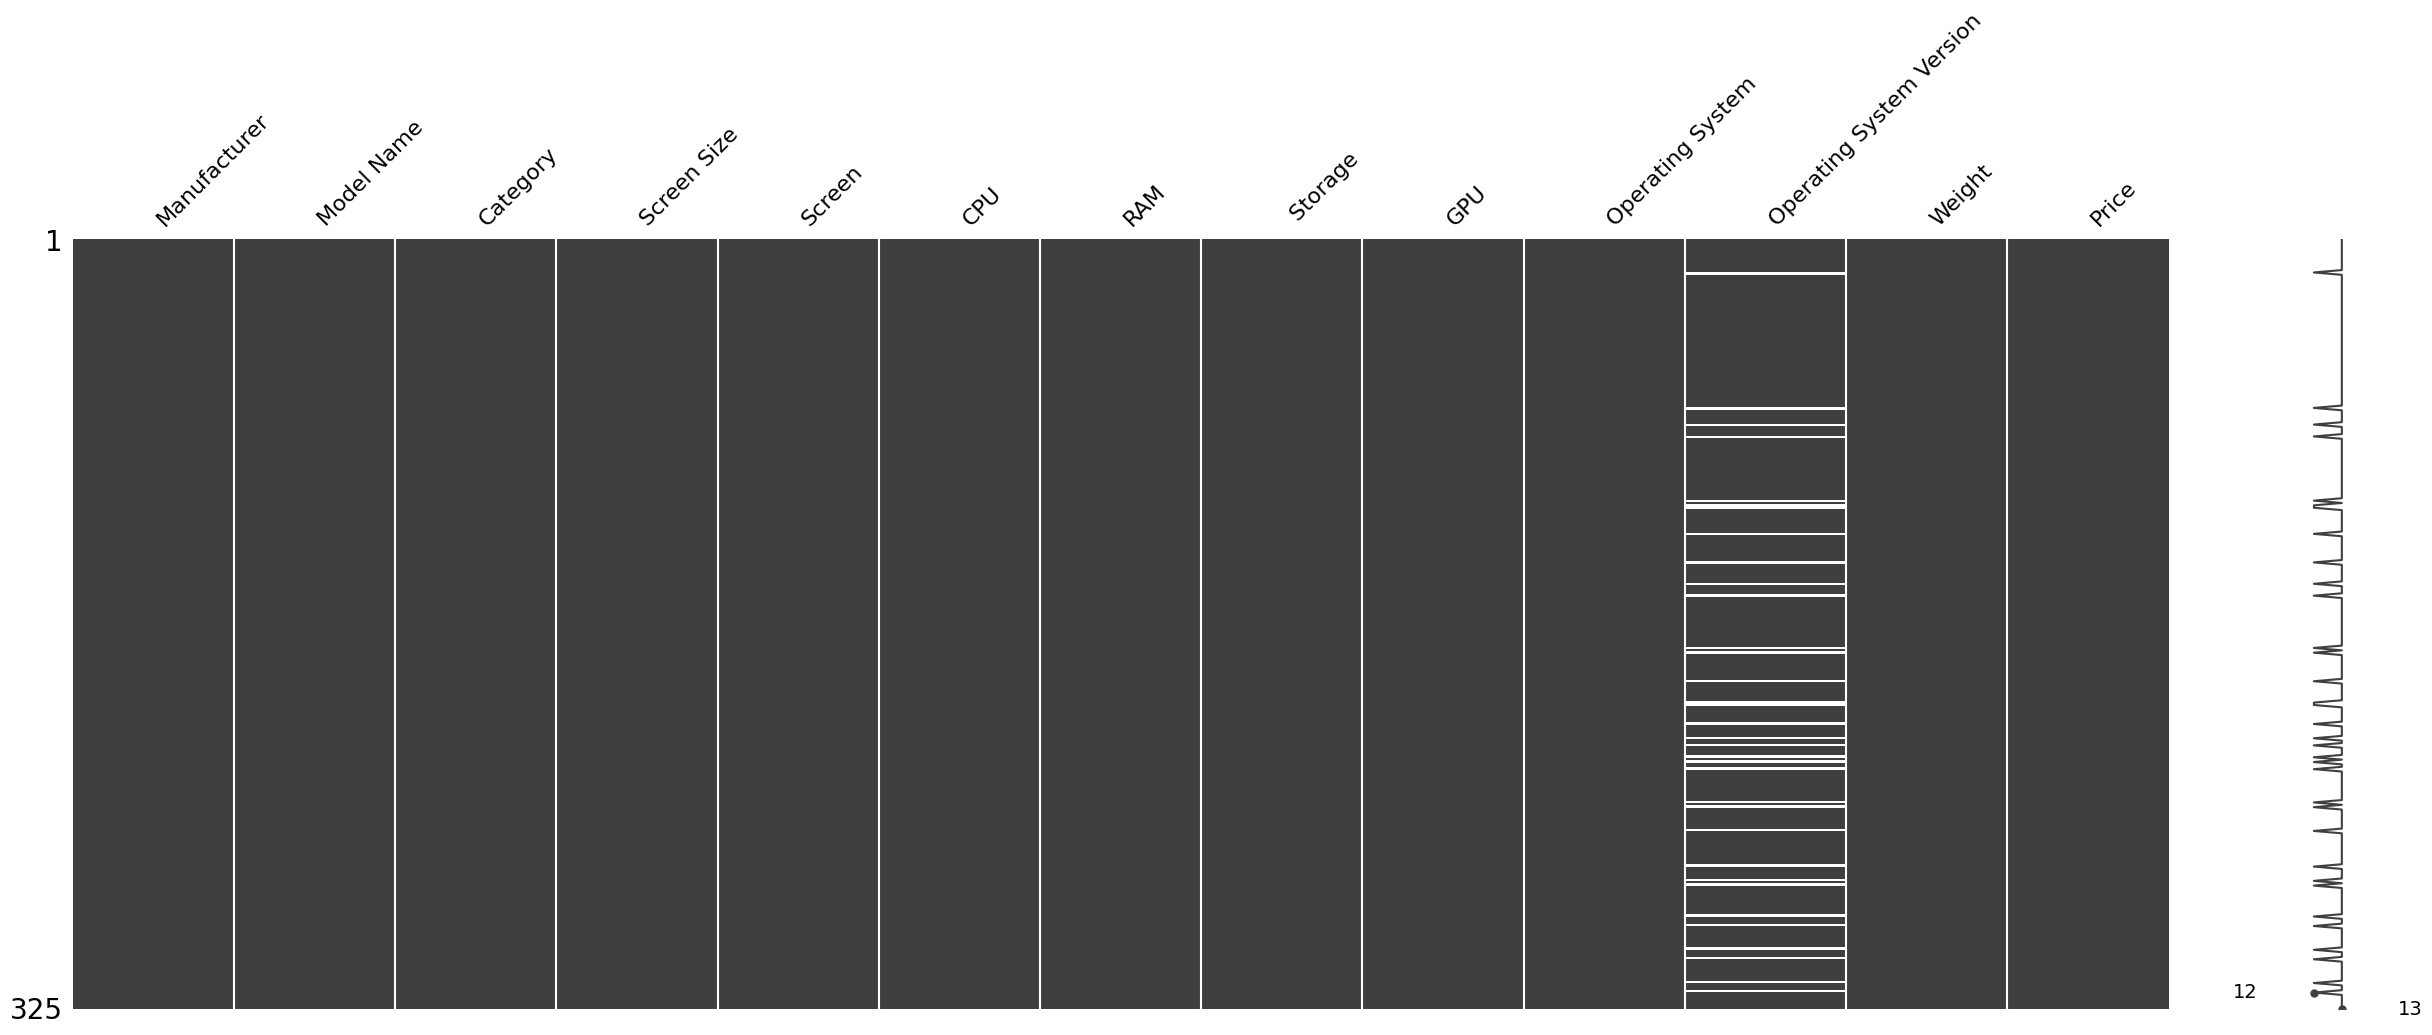

In [ ]:
#Valuing null values
msno.matrix(df, figsize= (30,10))

In [ ]:
df_test.describe()

,Price
count,9.770000e+02
mean,1.001899e+07
std,6.306430e+06
min,1.706375e+06
25%,5.326308e+06
50%,8.527428e+06
75%,1.311570e+07
max,5.423231e+07


In [ ]:
#Record t#The the number of duplicate values
#What is #The percentage of duplicate values
#Work with df data here!
print('The number of duplicate values is: \n' + str(df_test.duplicated().sum()))

print('The number of duplicate values as a Percentage (%): \n'+  str(df_test.duplicated().sum() / len(df_test) *100))

The number of duplicate values is: 
0
The number of duplicate values as a Percentage (%): 
0.0


Conclusions:
1. The number of varaibles is 13, from this number 12 are object variables, and 1 numerical float variable.
2. The number of Observations(sample size) is 977
3. There are no duplicate values in the df_test dataset